In [41]:
# Para hacer los ejemplos vamos a usar la base de datos de arbolado
import pandas as pd

#arboles = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/arbolado-publico-lineal/arbolado-publico-lineal-2017-2018.csv")
arboles = pd.read_csv("arbolado.csv")

arboles.head()

C:\Users\Ionatan\AppData\Local\Temp\ipykernel_2428\1598610678.py:5: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  arboles = pd.read_csv("arbolado.csv")


,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800.0,848.0,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0


In [42]:
arbolado = arboles

In [43]:
# Queremos quedarnos con los arboles de las especies mas numerosas

limite = 10000

arbolado = arbolado.groupby(['nombre_cientifico']).filter(lambda grp: grp.shape[0] > limite)

In [44]:
# queremos saber el promedio de altura para cada especie

arbolado.groupby(['nombre_cientifico']).apply(lambda grp: grp['altura_arbol'].mean())

nombre_cientifico
Ficus benjamina            6.713268
Fraxinus americana         9.483474
Fraxinus pennsylvanica     9.498325
Jacaranda mimosifolia      7.619203
Lagerstroemia indica       4.205141
Melia azedarach           10.560322
Platanus x acerifolia     16.773075
Tilia x moltkei            8.374855
dtype: float64

In [45]:
import numpy as np
# Hay datos faltantes de altura
arbolado['altura_arbol'].isna().sum()

# Queremos completarlo por un promedio de la altura condicionado por especie de arbol y comuna

arbolado_agrupado = arbolado.groupby(['nombre_cientifico','comuna'])

arbolado_altura_para_imputar = arbolado_agrupado['altura_arbol'].transform(lambda x: x.mean())
arbolado['altura_imputada'] = arbolado['altura_arbol'].fillna(arbolado_altura_para_imputar)

arbolado[arbolado['altura_arbol'].isna()]

,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol,altura_imputada
128,-58.389326,-34.604797,43336,Lineal,1,NaN,Montevideo,300.0,357.0,MONTEVIDEO 357,LD,Ficus benjamina,2.1,Ocupada,Regular,A nivel,0.0,NaN,6.297907
1606,-58.362066,-34.618017,60037,Lineal,1,NaN,Dealessi Pierina,1500.0,1700.0,"DEALESSI, PIERINA 1700",LD,Jacaranda mimosifolia,12,Sobreocupada,Regular,A nivel,25.0,NaN,7.304348
2907,-58.388929,-34.615075,64436,Lineal,1,NaN,Cevallos Virrey,500.0,540.0,"CEVALLOS, VIRREY 540",LD,Ficus benjamina,2.8,Ocupada,Regular,A nivel,0.0,NaN,6.297907
3373,-58.378697,-34.620985,64805,Lineal,1,NaN,Tacuarí,1100.0,1109.0,TACUARI 1109,Exacta,Fraxinus pennsylvanica,2.5,Ocupada,Regular,A nivel,0.0,NaN,9.189558
4007,-58.370227,-34.600462,67630,Lineal,1,NaN,Além Leandro N. Av.,600.0,619.0,"ALEM, LEANDRO N. AV. 619",Exacta,Platanus x acerifolia,5,Ocupada,Ochava,A nivel,2.0,NaN,15.599193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367972,NaN,NaN,165357,Lineal,14,NaN,Campos Luis María Av.,NaN,NaN,"CAMPOS, LUIS M. AV.",LD,Jacaranda mimosifolia,3.8,Ocupada,Regular,A nivel,14.0,NaN,9.552888
368570,NaN,NaN,191095,Lineal,15,305,Ballivián José,3200.0,3289,NaN,LD,Fraxinus americana,NaN,Ocupada,Regular,A nivel,50.0,NaN,9.620430
368590,NaN,NaN,191126,Lineal,15,305,Ballivián José,3200.0,3289,NaN,LA,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,25.0,NaN,9.613129
369062,NaN,NaN,213962,Lineal,15,15,Giribone,4300.0,4331.0,NaN,Exacta,Platanus x acerifolia,8,Ocupada,Regular,A nivel,1.0,NaN,16.923894


In [46]:
# Vamos a hacer un mapa con el arbol mas frecuente en cada comuna y el numero de ejemplares
import shapely.wkt
import geopandas as gpd
import matplotlib.pyplot as plt

comunas = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/comunas/comunas.csv")
comunas["WKT"] = comunas["WKT"].apply(shapely.wkt.loads) 
geo_comunas = gpd.GeoDataFrame(comunas, geometry='WKT')


0      Annotation(-58.3949, -34.5858, '2.0')
1      Annotation(-58.4436, -34.6168, '6.0')
2     Annotation(-58.5029, -34.6278, '10.0')
3     Annotation(-58.4969, -34.6061, '11.0')
4     Annotation(-58.4904, -34.5663, '12.0')
5     Annotation(-58.4223, -34.5739, '14.0')
6     Annotation(-58.4628, -34.5919, '15.0')
7     Annotation(-58.4541, -34.5545, '13.0')
8      Annotation(-58.3888, -34.6423, '4.0')
9      Annotation(-58.4206, -34.6174, '5.0')
10     Annotation(-58.4519, -34.6365, '7.0')
11     Annotation(-58.4027, -34.6138, '3.0')
12     Annotation(-58.4991, -34.6517, '9.0')
13     Annotation(-58.4622, -34.6745, '8.0')
14     Annotation(-58.3717, -34.6063, '1.0')
dtype: object

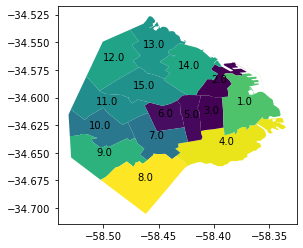

In [47]:
fig, ax = plt.subplots()
geo_comunas.plot(ax=ax, column="AREA")
geo_comunas.apply(lambda x: ax.annotate(text=x['COMUNAS'], xy=x.WKT.centroid.coords[0], ha='center'), axis=1)

In [48]:
# Queremos mergear los datos

arbolado_agrupado = arbolado.groupby(['comuna'])
segunda_especie_mas_frecuente = arbolado_agrupado.apply(lambda x: x['nombre_cientifico'].value_counts().index.values[1])
segunda_especie_mas_frecuente.name = 'Segunda Especie' # Esto es para mas adelante
frecuencia = arbolado_agrupado.apply(lambda x: x['nombre_cientifico'].value_counts().values[0])
frecuencia.name = 'Numero de arboles'
display (segunda_especie_mas_frecuente)
display (frecuencia)

comuna
1     Jacaranda mimosifolia
2           Ficus benjamina
3           Ficus benjamina
4     Platanus x acerifolia
5     Platanus x acerifolia
6           Ficus benjamina
7     Platanus x acerifolia
8           Ficus benjamina
9     Platanus x acerifolia
10    Platanus x acerifolia
11    Platanus x acerifolia
12    Platanus x acerifolia
13    Platanus x acerifolia
14    Platanus x acerifolia
15    Platanus x acerifolia
Name: Segunda Especie, dtype: object

comuna
1      4107
2      2508
3      7120
4     15306
5      6303
6      6058
7      9728
8      6649
9     11235
10    11786
11    10497
12    13718
13    11044
14     7409
15    10141
Name: Numero de arboles, dtype: int64

In [49]:
geo_comunas.head()

geo_comunas.index = geo_comunas['COMUNAS']

geo_comunas.head()

geo_comunas = geo_comunas.join(segunda_especie_mas_frecuente)
geo_comunas = geo_comunas.join(frecuencia)
geo_comunas.head()

,WKT,ID,OBJETO,COMUNAS,BARRIOS,PERIMETRO,AREA,Segunda Especie,Numero de arboles
COMUNAS,,,,,,,,,
2.0,"MULTIPOLYGON (((-58.38000 -34.57002, -58.38002...",1,LIMITE COMUNAL,2.0,RECOLETA,21452.838648,6.317265e+06,Ficus benjamina,2508
6.0,"MULTIPOLYGON (((-58.43061 -34.60705, -58.43056...",3,LIMITE COMUNAL,6.0,CABALLITO,10990.964471,6.851029e+06,Ficus benjamina,6058
10.0,"MULTIPOLYGON (((-58.48834 -34.62016, -58.48820...",6,LIMITE COMUNAL,10.0,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,18332.037457,1.265656e+07,Platanus x acerifolia,11786
11.0,"MULTIPOLYGON (((-58.49838 -34.59637, -58.49718...",7,LIMITE COMUNAL,11.0,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,19987.696155,1.412004e+07,Platanus x acerifolia,10497
12.0,"MULTIPOLYGON (((-58.50331 -34.59386, -58.50347...",8,LIMITE COMUNAL,12.0,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,17232.189372,1.557093e+07,Platanus x acerifolia,13718


[Text(0.5, 1.0, 'Segunda especie mas frecuente de arboles')]

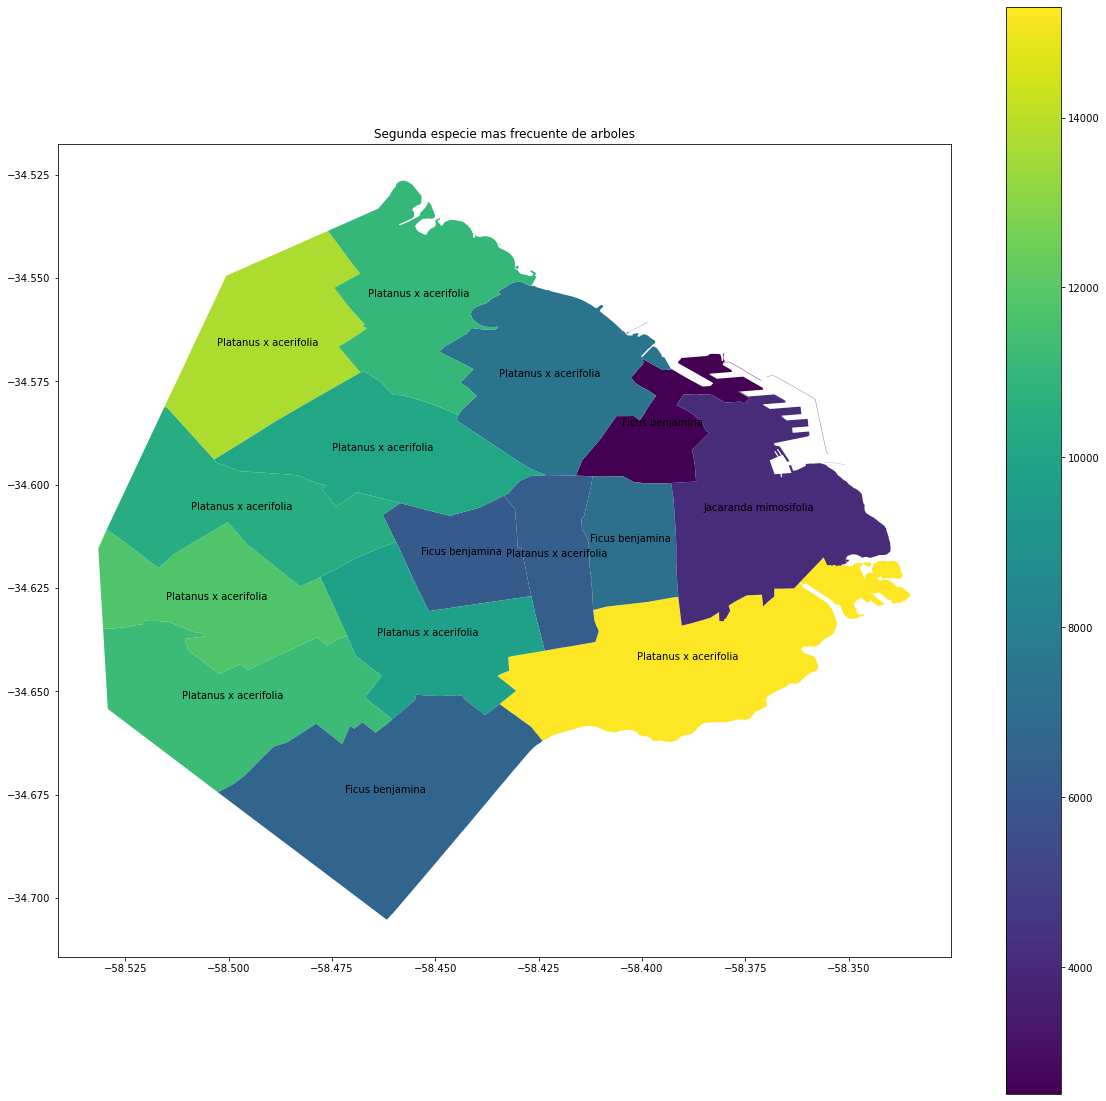

In [50]:
fig, ax = plt.subplots(figsize = (20,20))
geo_comunas.plot(ax=ax, column="Numero de arboles", legend=True)
geo_comunas.apply(lambda x: ax.annotate(text=x['Segunda Especie'], xy=x.WKT.centroid.coords[0], ha='center'), axis=1)
ax.set(title='Segunda especie mas frecuente de arboles')